In [167]:
import pandas as pd
import numpy as np

In [227]:
adj = pd.read_csv('adj.txt', header=None)
# make adj matrix
adj_matrix = np.zeros((len(adj),len(adj)))
for i in range(len(adj)):
    for j in range(len(adj)):
        if i == j:
            continue
        if str(j) in adj.iloc[i,0].split(' '):
            adj_matrix[i,j] = 1
            adj_matrix[j,i] = 1
# label            
label = np.loadtxt('karate_label.txt')

In [571]:
embedding_dim = 4
learning_rate = 0.005
n_iter = 200
np.random.seed(seed=0) 
embedding_vec = np.random.rand(len(adj),embedding_dim)

for _ in range(n_iter):
    e_matrix = np.matmul(embedding_vec, embedding_vec.T) - adj_matrix
    for i in range(0, 34):
        for j in range(0, 34):
            if i == j:
                continue
            embedding_vec[i] -= learning_rate * e_matrix[i][j] * embedding_vec[j]

In [572]:
from sklearn.manifold import TSNE
tsne_result = TSNE(n_components=2, perplexity=4).fit_transform(embedding_vec)

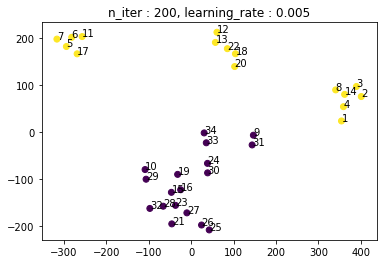

In [573]:
import matplotlib.pyplot as plt
plt.title(f'n_iter : {n_iter}, learning_rate : {learning_rate}')
plt.scatter(tsne_result[:,0],tsne_result[:,1], c=list(map(int, label[:,1])))
for i in range(0, 34):
        plt.text(float(tsne_result[i,0]), float(tsne_result[i,1]), i+1 , fontsize=10)
plt.show()